# Historical CGR Category

## CGR Budgetary Category 

Entities required to submit budget information in accordance with the provisions of Title II and VI of Resolution No. 0007 of 2016 issued by the Comptroller General of the Republic. 0007 of 2016 issued by the Comptroller General of the Republic, must do so through the Consolidator of Finance and Public Information - CHIP, category CGR_Budgetary, with the institutional code assigned in that platform, except for Financial Entities, Chambers of Commerce, Family Compensation Funds, EPS, Pension and Severance Funds, Autonomous Estates and private entities that manage public resources, which had not been rendering; They will be informed of the methodology and dates on which they must start submitting information once the catalogs of accounts applicable to them are ready.

-**Entity:** Contaduría General de la Nación.

-**Description:** Contains historical information of the categories of municipalities (2012-2022)
Variables.

1. **codigo_cgr** - int - Code assigned by the Contraloría General de la Nación
2. **divipola** - int - Municipality code
3. **department** - string - department name
4. **MUNICIPALITY** - string - name of the municipality
5. **Cat_2012** - int - category of municipalities for the validity 2012
6. **Cat_2013** - int - category of municipalities for the validity 2013
7. **Cat_2014** - int - category of the municipalities for the validity 2014
8. **Cat_2015** - int - category of municipalities for the validity 2015
9. **Cat_2016** - int - category of municipalities for the validity 2016
10. **Cat_2017** - int - category of municipalities for the validity 2017
11. **Cat_2018** - int - categoría of the municipalities for the validity 2018
12. **Cat_2019** - int - category of municipalities for the validity 2019
13. **Cat_2020** - int - category of municipalities for the validity 2020
14. **Cat_2021** - int - category of municipalities for the validity 2021
15. **Cat_2022** - int - category of municipalities for the validity 202

More references here:
- https://www.contraloria.gov.co/web/finanzas-publicas/categoria-presupuestal
- http://www.chip.gov.co/AyudaWEB/ManualCGR/Instructivo_CGR_Sistema_General_de_Regalias.pdf
- https://portalcef.contraloria.gov.co/assets/docs/330-61d38d08-2135-437a-95c2-f7c083b60ff9/categoriasCGR.pdf

## 1. Data previsualization 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cgr = pd.read_csv("/Repositorios/DS4A---Asocapitales-project/DataBases/CATEGORIA/categoria cgr historico.csv", sep = ";", on_bad_lines='skip')
cgr.head()

,codigo_cgr,divipola,departamento,MUNICIPIO,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_2020,cat_2021,cat_2022
0,210105001.0,5001.0,ANTIOQUIA,MEDELLIN,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
1,210205002.0,5002.0,ANTIOQUIA,ABEJORRAL,6,6,6,6,6,6,6,6,6,6,6
2,210405004.0,5004.0,ANTIOQUIA,ABRIAQUI,6,6,6,6,6,6,6,6,6,6,6
3,212105021.0,5021.0,ANTIOQUIA,ALEJANDRIA,6,6,6,6,6,6,6,6,6,6,6
4,213005030.0,5030.0,ANTIOQUIA,AMAGA,6,6,6,6,6,6,6,6,6,6,6


From the first 5 row from the Historical CRG category, it is possible to confirm that deals with structured data composed has only by categorical ordinal data, from the year 2012 to 2022, where the cat columns represent the category of the minicipio been 1 the highest category and 6 the lowest, the one with the largest and the one with the smallest budget, respectively

For more information clic [here](https://portalcef.contraloria.gov.co/assets/docs/330-61d38d08-2135-437a-95c2-f7c083b60ff9/categoriasCGR.pdf)


In [3]:
cgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo_cgr    1102 non-null   float64
 1   divipola      1102 non-null   float64
 2   departamento  1102 non-null   object 
 3   MUNICIPIO     1102 non-null   object 
 4   cat_2012      1101 non-null   object 
 5   cat_2013      1101 non-null   object 
 6   cat_2014      1101 non-null   object 
 7   cat_2015      1100 non-null   object 
 8   cat_2016      1102 non-null   object 
 9   cat_2017      1101 non-null   object 
 10  cat_2018      1101 non-null   object 
 11  cat_2019      1101 non-null   object 
 12  cat_2020      1101 non-null   object 
 13  cat_2021      1102 non-null   object 
 14  cat_2022      1102 non-null   object 
dtypes: float64(2), object(13)
memory usage: 129.5+ KB


There are 1014 individuals one by each Colombian municipality and 15 variables including a unique cgr code, a unique davipola code, the name of the department to which the municipality belongs, the minipality name at the budget category of the municipality from 2012 to 2022.

In [4]:
cgr.size

16560

As can been seen the total length of the dataset is 16560 data points

In [5]:
cgr.isna().sum()

codigo_cgr      2
divipola        2
departamento    2
MUNICIPIO       2
cat_2012        3
cat_2013        3
cat_2014        3
cat_2015        4
cat_2016        2
cat_2017        3
cat_2018        3
cat_2019        3
cat_2020        3
cat_2021        2
cat_2022        2
dtype: int64

In [6]:
cgr.isna().sum().sum()

39

By checking the dataset it can be seen that only $0.0005%$ of the data is are nan values, this is a great advantage because the imputation methods will not significantly affect the distribution of the data. For apply the inputation methods first it is necessary to transform the categorical ordinal variables to continuous variables.

## 2. Data Cleaning

Since the dataset is only composed of categorical data, where only some of the municipalities have the special category, we considered analyzing the behavior of these municipalities independently. Therefore, the data set will be divided in 2, one data set for the municipalities between categories 1 to 6 and another for the municipalities that were once classified as "ESP" special.

### 2.1 Data Splitting

In [7]:
# First, a list of the columns to be evaluated will be created.
columns = ['cat_'+ str(year) for year in list(range(2012,2023))]

A copy of the original dataset is generated and divided into the special municipalities dataset and the categories dataset.

In [8]:
import copy
cgr_esp = copy.deepcopy(cgr)

In [9]:
# This process allow the selection of the municipalities that are or were clasified as ESP
to_keep = []
for column in columns:
    to_drop = list(cgr[cgr[column] == 'ESP'].index)
    to_keep.append(to_drop)
    cgr = cgr.drop(to_drop)

Visualization of the numerical categories dataset

In [10]:
cgr.head()

,codigo_cgr,divipola,departamento,MUNICIPIO,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_2020,cat_2021,cat_2022
1,210205002.0,5002.0,ANTIOQUIA,ABEJORRAL,6,6,6,6,6,6,6,6,6,6,6
2,210405004.0,5004.0,ANTIOQUIA,ABRIAQUI,6,6,6,6,6,6,6,6,6,6,6
3,212105021.0,5021.0,ANTIOQUIA,ALEJANDRIA,6,6,6,6,6,6,6,6,6,6,6
4,213005030.0,5030.0,ANTIOQUIA,AMAGA,6,6,6,6,6,6,6,6,6,6,6
5,213105031.0,5031.0,ANTIOQUIA,AMALFI,6,6,6,6,6,6,6,6,6,6,6


In [11]:
# A flat list with the municipalities classified as ESP is created
flat_list = [item for sublist in to_keep for item in sublist]
flat_list

[0, 125, 148, 149, 845, 1005, 779]

In [12]:
# The fist dataframe that contains only the Municipalities classified as special is created
cgr_esp =  cgr_esp.loc[flat_list]
cgr_esp

,codigo_cgr,divipola,departamento,MUNICIPIO,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_2020,cat_2021,cat_2022
0,210105001.0,5001.0,ANTIOQUIA,MEDELLIN,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
125,210108001.0,8001.0,ATLANTICO,"BARRANQUILLA, DISTRITO ESP, INDUSTRIAL Y PORTU...",ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
148,210111001.0,11001.0,CUNDINAMARCA,BOGOTA D.C.,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
149,210113001.0,13001.0,BOLIVAR,"CARTAGENA DE INDIAS, DISTRITO TURISTICO Y CULT...",ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
845,210168001.0,68001.0,SANTANDER,BUCARAMANGA,ESP,ESP,ESP,ESP,ESP,ESP,1,ESP,1,ESP,1
1005,210176001.0,76001.0,VALLE DEL CAUCA,CALI,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
779,210154001.0,54001.0,NORTE DE SANTANDER,CUCUTA,1,1,ESP,ESP,1,1,1,1,1,1,1


As can be seen, all the municipalities, with the exception of Cucuta and Bucaramanga, have maintained their classification as special districts.

### 2.2 Filling NaN and typo values

First we delete all rows with missing data, this will not affect the dataset, as the deleted municipalities did not have any temporary classification data between 2012 and 2022.

In [13]:
cgr.dropna(inplace = True)
cgr.isna().sum()

codigo_cgr      0
divipola        0
departamento    0
MUNICIPIO       0
cat_2012        0
cat_2013        0
cat_2014        0
cat_2015        0
cat_2016        0
cat_2017        0
cat_2018        0
cat_2019        0
cat_2020        0
cat_2021        0
cat_2022        0
dtype: int64

After they removed the typos and replaced them with NAN

In [14]:
cgr.replace('#¡VALOR!',np.NaN, inplace = True)
cgr.isna().sum().sum()

2

After that, we fill in the NaN values, replacing the value with the previous data reported by each municipality.

In [15]:
cgr.fillna(method = 'pad',inplace = True)
cgr.isna().sum().sum()

0

To finally transform these categories into numerical data, to facilitate their evaluation.

In [16]:
numeric = cgr[columns].astype('int8')
numeric.head()

,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_2020,cat_2021,cat_2022
1,6,6,6,6,6,6,6,6,6,6,6
2,6,6,6,6,6,6,6,6,6,6,6
3,6,6,6,6,6,6,6,6,6,6,6
4,6,6,6,6,6,6,6,6,6,6,6
5,6,6,6,6,6,6,6,6,6,6,6


In [17]:
cgr.drop(columns, axis = 1, inplace = True)
cgr

,codigo_cgr,divipola,departamento,MUNICIPIO
1,210205002.0,5002.0,ANTIOQUIA,ABEJORRAL
2,210405004.0,5004.0,ANTIOQUIA,ABRIAQUI
3,212105021.0,5021.0,ANTIOQUIA,ALEJANDRIA
4,213005030.0,5030.0,ANTIOQUIA,AMAGA
5,213105031.0,5031.0,ANTIOQUIA,AMALFI
...,...,...,...,...
1097,216697666.0,97666.0,VAUPES,TARAIRA
1098,210199001.0,99001.0,VICHADA,PUERTO CARREÑO
1099,212499524.0,99524.0,VICHADA,LA PRIMAVERA
1100,212499624.0,99624.0,VICHADA,SANTA ROSALIA


In [18]:
cgr = pd.concat([cgr,numeric], axis = 1)
cgr

,codigo_cgr,divipola,departamento,MUNICIPIO,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_2020,cat_2021,cat_2022
1,210205002.0,5002.0,ANTIOQUIA,ABEJORRAL,6,6,6,6,6,6,6,6,6,6,6
2,210405004.0,5004.0,ANTIOQUIA,ABRIAQUI,6,6,6,6,6,6,6,6,6,6,6
3,212105021.0,5021.0,ANTIOQUIA,ALEJANDRIA,6,6,6,6,6,6,6,6,6,6,6
4,213005030.0,5030.0,ANTIOQUIA,AMAGA,6,6,6,6,6,6,6,6,6,6,6
5,213105031.0,5031.0,ANTIOQUIA,AMALFI,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,216697666.0,97666.0,VAUPES,TARAIRA,6,6,6,6,6,6,6,6,6,6,6
1098,210199001.0,99001.0,VICHADA,PUERTO CARREÑO,6,4,6,4,6,6,6,6,4,6,6
1099,212499524.0,99524.0,VICHADA,LA PRIMAVERA,6,6,6,6,6,6,6,6,6,6,6
1100,212499624.0,99624.0,VICHADA,SANTA ROSALIA,6,6,6,6,6,6,6,6,6,6,6


It can be seen that now all the categories by year are numerical data.

In [19]:
cgr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 1 to 1101
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo_cgr    1093 non-null   float64
 1   divipola      1093 non-null   float64
 2   departamento  1093 non-null   object 
 3   MUNICIPIO     1093 non-null   object 
 4   cat_2012      1093 non-null   int8   
 5   cat_2013      1093 non-null   int8   
 6   cat_2014      1093 non-null   int8   
 7   cat_2015      1093 non-null   int8   
 8   cat_2016      1093 non-null   int8   
 9   cat_2017      1093 non-null   int8   
 10  cat_2018      1093 non-null   int8   
 11  cat_2019      1093 non-null   int8   
 12  cat_2020      1093 non-null   int8   
 13  cat_2021      1093 non-null   int8   
 14  cat_2022      1093 non-null   int8   
dtypes: float64(2), int8(11), object(2)
memory usage: 54.4+ KB


## 3. Data Visualization

### 3.1 Frequency analysis

The conversion of these numerical data shows that the data are skewed to the left, i.e. there are much more municipalities in category 6 than in the other categories.

In [20]:
cgr[columns].describe()

,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_2020,cat_2021,cat_2022
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,5.727356,5.715462,5.699909,5.693504,5.696249,5.697164,5.689844,5.688930,5.674291,5.670631,5.688015
std,0.926192,0.956235,0.982246,0.989100,0.989484,0.998516,1.009051,1.009223,1.031575,1.024171,1.009394
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [21]:
def plot_distribution(df, columns):
        
    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(141)
    sns.countplot(df[columns[0]])

    ax2 = fig.add_subplot(142)
    sns.countplot(df[columns[1]])
    
    ax3 = fig.add_subplot(143)
    sns.countplot(df[columns[2]])
    
    ax4 = fig.add_subplot(144)
    sns.countplot(df[columns[3]])

    fig.suptitle('Distribution of municipalities from ' + columns[0] + ' to ' + columns[3])
    plt.show();      

this is easier to appreciate by using a bar chart with the frequency of each category for each year.

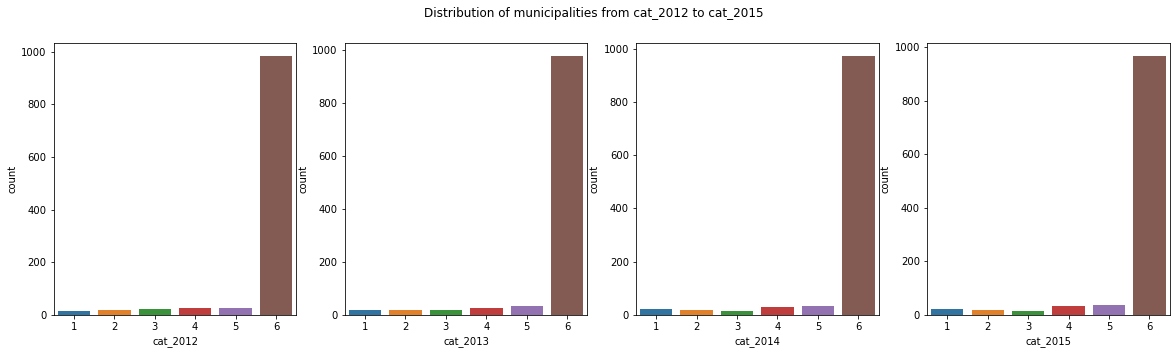

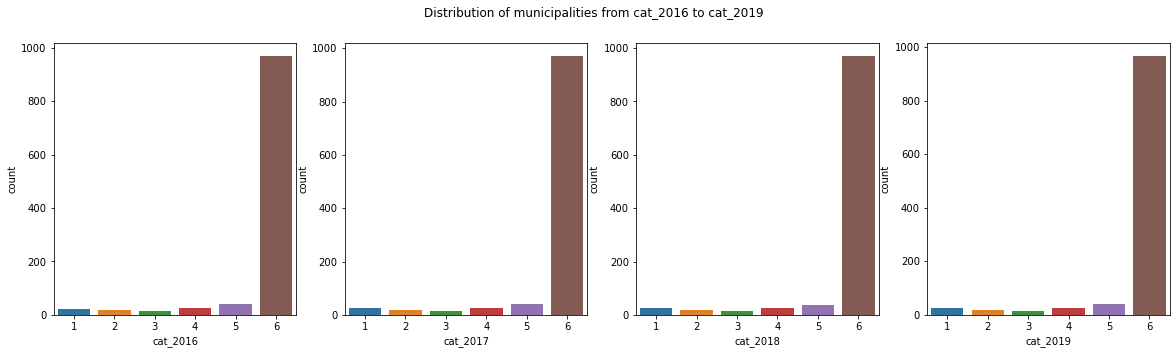

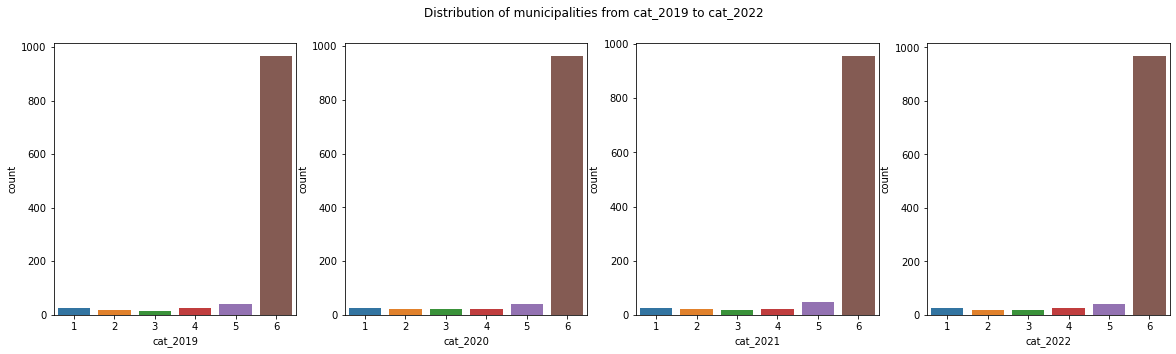

In [22]:
plot_distribution(cgr, columns[0:4])
plot_distribution(cgr, columns[4:8])
plot_distribution(cgr, columns[7:])

### 3.2 Historical analysis

As mentioned above and given the bias in the data, it is best in this case to analyze independently the municipalities classified in category 6 and the municipalities classified in categories 1 to 5.

In [23]:
cgr_years = cgr['cat_2012'].value_counts().sort_index(ascending = False)
cgr_years.to_frame()
for column in columns[1:]:
    aux= cgr[column].value_counts().sort_index(ascending = False)
    cgr_years = pd.concat([cgr_years, aux.to_frame()], axis = 1)

In [24]:
# Frecuency table
cgr_years

,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_2020,cat_2021,cat_2022
6,983,978,972,967,969,971,970,967,964,956,968
5,28,33,34,38,39,39,36,41,40,49,39
4,26,26,30,32,27,26,27,26,22,23,24
3,22,18,16,14,16,13,16,15,21,19,19
2,18,18,19,19,19,19,19,18,21,22,18
1,16,20,22,23,23,25,25,26,25,24,25


It is clear that the municipalities in category 6 occupy almost 90% of the municipalities, the other categories do not exceed 3% individually.

In [25]:
# Percentage table
cgr_years/cgr.shape[0]

,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_2020,cat_2021,cat_2022
6,0.899360,0.894785,0.889296,0.884721,0.886551,0.888381,0.887466,0.884721,0.881976,0.874657,0.885636
5,0.025618,0.030192,0.031107,0.034767,0.035682,0.035682,0.032937,0.037511,0.036597,0.044831,0.035682
4,0.023788,0.023788,0.027447,0.029277,0.024703,0.023788,0.024703,0.023788,0.020128,0.021043,0.021958
3,0.020128,0.016468,0.014639,0.012809,0.014639,0.011894,0.014639,0.013724,0.019213,0.017383,0.017383
2,0.016468,0.016468,0.017383,0.017383,0.017383,0.017383,0.017383,0.016468,0.019213,0.020128,0.016468
1,0.014639,0.018298,0.020128,0.021043,0.021043,0.022873,0.022873,0.023788,0.022873,0.021958,0.022873


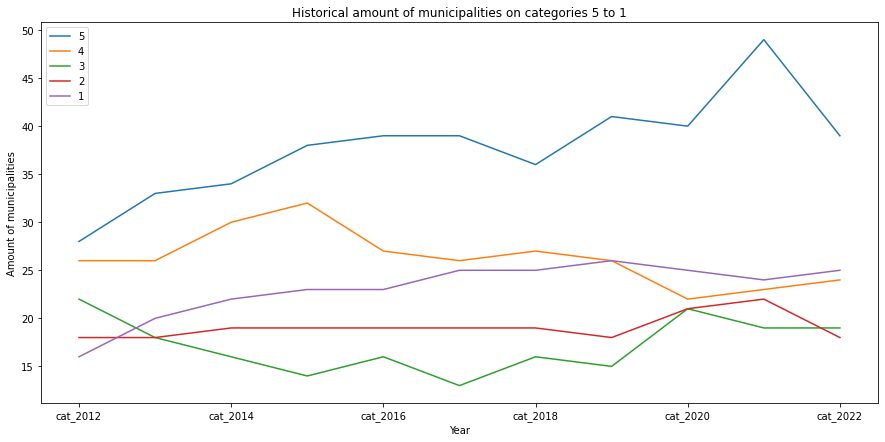

In [26]:
cgr_years.iloc[1:,:].T.plot(figsize = (15,7))
plt.xlabel('Year')
plt.ylabel('Amount of municipalities')
plt.title('Historical amount of municipalities on categories 5 to 1')
plt.legend(loc='upper left')

In general, we see a growing trend in category 1, that is to say that these municipalities are increasing their population and their total income, as well as the number of municipalities in category 2, which suffered a small drop in 2012, so it is expected that some of these municipalities moved up their classification to category 1. On the other hand, there is a primarily increasing trend in the municipalities classified in category 5, i.e., with the exception of the last year, many municipalities fell from category 4 to 5.

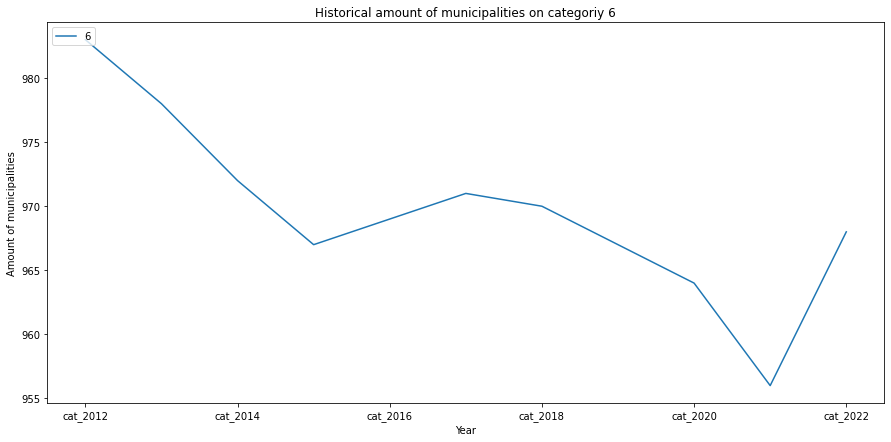

In [27]:
cgr_years.iloc[0,:].T.plot(figsize = (15,7))
plt.xlabel('Year')
plt.ylabel('Amount of municipalities')
plt.title('Historical amount of municipalities on categoriy 6')
plt.legend(loc='upper left')

In general, the number of municipalities in category 6 has shown a decreasing trend, however, the drop in the number of municipalities in category 5 by 2022 is reflected in the increase of municipalities in category 6, which indicates that these municipalities now have a smaller population or lower income, or both by 2022, indicating a return in the growth of these municipalities to values close to those of 2016. 

In [31]:
cgr_esp

,codigo_cgr,divipola,departamento,MUNICIPIO,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_2020,cat_2021,cat_2022
0,210105001.0,5001.0,ANTIOQUIA,MEDELLIN,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
125,210108001.0,8001.0,ATLANTICO,"BARRANQUILLA, DISTRITO ESP, INDUSTRIAL Y PORTU...",ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
148,210111001.0,11001.0,CUNDINAMARCA,BOGOTA D.C.,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
149,210113001.0,13001.0,BOLIVAR,"CARTAGENA DE INDIAS, DISTRITO TURISTICO Y CULT...",ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
845,210168001.0,68001.0,SANTANDER,BUCARAMANGA,ESP,ESP,ESP,ESP,ESP,ESP,1,ESP,1,ESP,1
1005,210176001.0,76001.0,VALLE DEL CAUCA,CALI,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
779,210154001.0,54001.0,NORTE DE SANTANDER,CUCUTA,1,1,ESP,ESP,1,1,1,1,1,1,1


In [32]:
cgr_clean = pd.concat([cgr_esp, cgr])

In [33]:
cgr_clean

,codigo_cgr,divipola,departamento,MUNICIPIO,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_2020,cat_2021,cat_2022
0,210105001.0,5001.0,ANTIOQUIA,MEDELLIN,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
125,210108001.0,8001.0,ATLANTICO,"BARRANQUILLA, DISTRITO ESP, INDUSTRIAL Y PORTU...",ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
148,210111001.0,11001.0,CUNDINAMARCA,BOGOTA D.C.,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
149,210113001.0,13001.0,BOLIVAR,"CARTAGENA DE INDIAS, DISTRITO TURISTICO Y CULT...",ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
845,210168001.0,68001.0,SANTANDER,BUCARAMANGA,ESP,ESP,ESP,ESP,ESP,ESP,1,ESP,1,ESP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,216697666.0,97666.0,VAUPES,TARAIRA,6,6,6,6,6,6,6,6,6,6,6
1098,210199001.0,99001.0,VICHADA,PUERTO CARREÑO,6,4,6,4,6,6,6,6,4,6,6
1099,212499524.0,99524.0,VICHADA,LA PRIMAVERA,6,6,6,6,6,6,6,6,6,6,6
1100,212499624.0,99624.0,VICHADA,SANTA ROSALIA,6,6,6,6,6,6,6,6,6,6,6


In [34]:
#cgr_clean.to_csv('historico.csv')